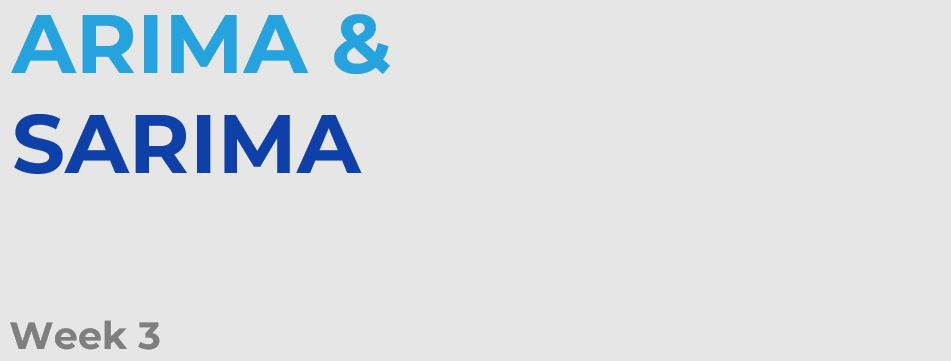

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color='blue'>AR / ARMA / ARIMA / SARIMA concepts can be understood through the below Case Study: </font>


### Problem Statement:
**The below dataset is having the monthly Sales data for the days Trucks of a certain company are being sold for the year 2022. The objective of this problem is to build a ARIMA/SARIMA forecasting model to forecast next 3 years of future sales**



#### <u> Import libraries </u>


In [1]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

#### <u>Load CSV</u>

In [3]:
data = pd.read_csv("Truck_sales.csv")
data.head(5)

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223


In [6]:
data.tail()

,Month-Year,Number_Trucks_Sold
139,14-Aug,933
140,14-Sep,704
141,14-Oct,639
142,14-Nov,571
143,14-Dec,666


#### <u>Code to convert/split the data as per frequency.</u>

In [4]:
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(data))

In [7]:
pd.date_range(start='2003-01-01', end='2014-12-01', freq='MS')

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [5]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [8]:
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names 
data['Year'] = dates.year

In [9]:
data

,Month-Year,Number_Trucks_Sold,Month,Year
0,03-Jan,155,Jan,2003
1,03-Feb,173,Feb,2003
2,03-Mar,204,Mar,2003
3,03-Apr,219,Apr,2003
4,03-May,223,May,2003
...,...,...,...,...
139,14-Aug,933,Aug,2014
140,14-Sep,704,Sep,2014
141,14-Oct,639,Oct,2014
142,14-Nov,571,Nov,2014


In [10]:
data.drop(['Month-Year'], axis=1, inplace=True)
data.rename(columns={'Number_Trucks_Sold':'Truck-Sales'}, inplace=True)
data = data[['Month', 'Year', 'Truck-Sales']]

In [11]:
data.set_index(dates, inplace=True)

In [12]:
data.head(5)

,Month,Year,Truck-Sales
2003-01-01,Jan,2003,155
2003-02-01,Feb,2003,173
2003-03-01,Mar,2003,204
2003-04-01,Apr,2003,219
2003-05-01,May,2003,223


#### <u>Code to extract the time-series and plot it, and provide the inferences accordingly.</u>

In [13]:
# extract out the time-series
sales_ts = data['Truck-Sales']

Text(0, 0.5, 'Truck Sales')

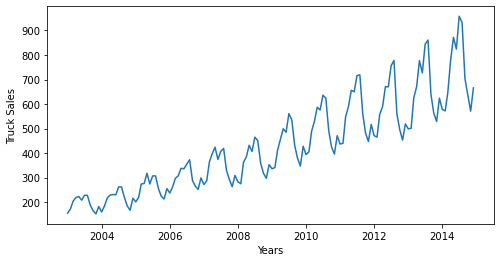

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Truck Sales')

#### Inference :

*We observe both trend and multiplicative seasonaliy from the plot shown above.*

## Concept Of Stationarity 
**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- A Time Series is considered to be stationary **when statistical properties such as the variance and (auto) correlation are constant over time.**


- Stationary Time Series allows us to think of the statistical properties of the time series as not changing in time, which enables us to build appropriate statistical models for forecasting based on past data. 


- Stationarity means that the **autocorrelation of lag ‘k’ depends on k, but not on time t.** 

    - <font color='blue'> Let $𝑋_𝑡$  denote the time series at time t.

    - Autocorrelation of lag k is the correlation between $𝑋_{𝑡}$  and $𝑋_{(𝑡−𝑘)}$</font> 




## How to check for Stationarity?


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

*So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .*



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


In [25]:
from statsmodels.tsa.stattools import adfuller

In [27]:
dftest = adfuller(sales_ts)#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is 1.116
DF test p-value is 0.9954


 ***the p-value 0.99 is very large, and not smaller than 0.05 and thus is not a stationary series.***

#### <u>Basic Bivariate Analysis</u>

*Performing the decomposition of data if there is an existence of seasonality and split the data accordingly.*

Observe how number of Trucks sold vary on a month on month basis. A stacked plot for every year will give us a clear pattern of any seasonality over the many years and those changes will be clearly reflected in the plots. 

In [17]:
monthly_sales_data = pd.pivot_table(data, values = "Truck-Sales", columns = "Year", index = "Month")
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,219,229,276,307,398,385,455,530,590,590,671,781
Aug,228,262,307,373,419,451,535,624,719,778,861,933
Dec,182,216,255,299,309,353,428,471,517,519,624,666
Feb,173,185,220,263,287,275,341,405,440,465,501,572
Jan,155,160,201,237,272,283,336,394,437,471,499,578
Jul,228,262,307,354,407,465,561,636,716,756,844,958
Jun,208,230,274,336,374,407,485,576,650,670,727,824
Mar,204,217,274,297,363,362,411,488,548,558,625,646
May,223,231,318,338,424,432,499,587,656,671,777,872


In [19]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,155,160,201,237,272,283,336,394,437,471,499,578
Feb,173,185,220,263,287,275,341,405,440,465,501,572
Mar,204,217,274,297,363,362,411,488,548,558,625,646
Apr,219,229,276,307,398,385,455,530,590,590,671,781
May,223,231,318,338,424,432,499,587,656,671,777,872
Jun,208,230,274,336,374,407,485,576,650,670,727,824
Jul,228,262,307,354,407,465,561,636,716,756,844,958
Aug,228,262,307,373,419,451,535,624,719,778,861,933
Sep,188,219,255,289,329,359,432,492,560,560,641,704


To represent the distribution of the data, if there is an existence of seasonality in a visualisation plot and provide inferences accordingly.

<AxesSubplot:xlabel='Month'>

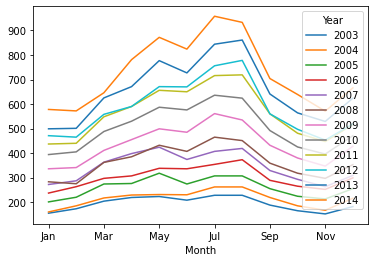

In [20]:
monthly_sales_data.plot()

In [21]:
yearly_sales_data = pd.pivot_table(data, values = "Truck-Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,155,173,204,219,223,208,228,228,188,165,152,182
2004,160,185,217,229,231,230,262,262,219,185,167,216
2005,201,220,274,276,318,274,307,307,255,224,213,255
2006,237,263,297,307,338,336,354,373,289,265,252,299
2007,272,287,363,398,424,374,407,419,329,293,263,309
2008,283,275,362,385,432,407,465,451,359,318,297,353
2009,336,341,411,455,499,485,561,535,432,380,347,428
2010,394,405,488,530,587,576,636,624,492,425,396,471
2011,437,440,548,590,656,650,716,719,560,481,447,517


<AxesSubplot:xlabel='Year'>

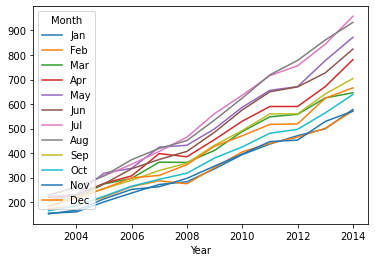

In [22]:
yearly_sales_data.plot()

<AxesSubplot:>

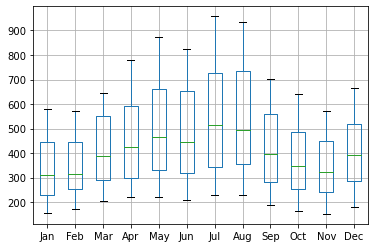

In [23]:
yearly_sales_data.boxplot()

<AxesSubplot:>

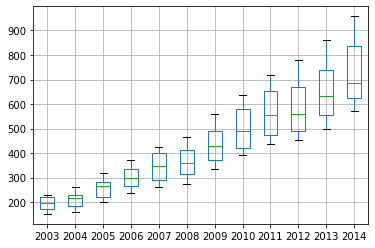

In [24]:
monthly_sales_data.boxplot()

#### Inferences:

- *The Truck sales have been increasing every year.*
- *July/August are the peak months for sales* 
- *Variance & Mean values in the above 2 months are also higher than any of the other months.*
- *12 months seasonal cycle is present as mean of each month year on year starts with an increasing trend in the beginning of the year and drops down towards the end of the year.*

#### <u>Time Series Decomposition</u>

In [29]:
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

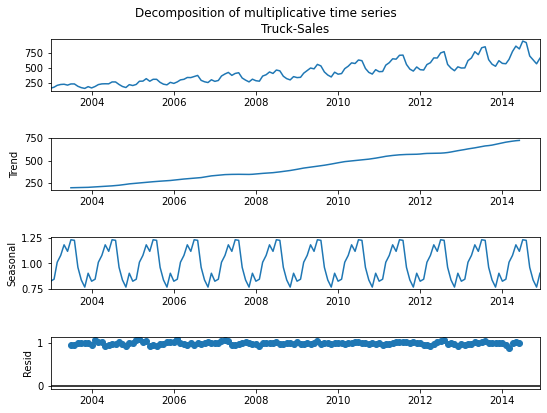

In [30]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [32]:
decomposition.trend.head(24)

2003-01-01           NaN
2003-02-01           NaN
2003-03-01           NaN
2003-04-01           NaN
2003-05-01           NaN
2003-06-01           NaN
2003-07-01    193.958333
2003-08-01    194.666667
2003-09-01    195.708333
2003-10-01    196.666667
2003-11-01    197.416667
2003-12-01    198.666667
2004-01-01    201.000000
2004-02-01    203.833333
2004-03-01    206.541667
2004-04-01    208.666667
2004-05-01    210.125000
2004-06-01    212.166667
2004-07-01    215.291667
2004-08-01    218.458333
2004-09-01    222.291667
2004-10-01    226.625000
2004-11-01    232.208333
2004-12-01    237.666667
Freq: MS, Name: trend, dtype: float64

In [33]:
decomposition.seasonal.head(24)

2003-01-01    0.823853
2003-02-01    0.843857
2003-03-01    1.012365
2003-04-01    1.080395
2003-05-01    1.185703
2003-06-01    1.120862
2003-07-01    1.235987
2003-08-01    1.230202
2003-09-01    0.961704
2003-10-01    0.836437
2003-11-01    0.765434
2003-12-01    0.903201
2004-01-01    0.823853
2004-02-01    0.843857
2004-03-01    1.012365
2004-04-01    1.080395
2004-05-01    1.185703
2004-06-01    1.120862
2004-07-01    1.235987
2004-08-01    1.230202
2004-09-01    0.961704
2004-10-01    0.836437
2004-11-01    0.765434
2004-12-01    0.903201
Freq: MS, Name: seasonal, dtype: float64

In [34]:
decomposition.resid.head(24)

2003-01-01         NaN
2003-02-01         NaN
2003-03-01         NaN
2003-04-01         NaN
2003-05-01         NaN
2003-06-01         NaN
2003-07-01    0.951070
2003-08-01    0.952065
2003-09-01    0.998866
2003-10-01    1.003044
2003-11-01    1.005893
2003-12-01    1.014290
2004-01-01    0.966216
2004-02-01    1.075542
2004-03-01    1.037803
2004-04-01    1.015781
2004-05-01    0.927168
2004-06-01    0.967160
2004-07-01    0.984601
2004-08-01    0.974891
2004-09-01    1.024423
2004-10-01    0.975957
2004-11-01    0.939574
2004-12-01    1.006239
Freq: MS, Name: resid, dtype: float64

#### Some of our key observations from this analysis:

1) *Trend: 12-months MA is a fairly straight line indicating a linear trend.*

2) *Seasonality: seasonality of 12 months is clearly visible*
 
3) *Irregular Remainder (random): The multiplicative model works as there are no patterns in the residuals*

## How to Make a Time Series Stationary ? - Differencing 'd'

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Differencing **'d'** is done on a non-stationary time series data one or more times to convert it into stationary. 



- **(d=1) 1st order differencing is done where the difference between the current and previous (1 lag before) series is taken and then checked for stationarity using the ADF(Augmented Dicky Fueller) test. If differenced time series is stationary, we proceed with AR modeling. Else we do (d=2) 2nd order differencing, and this process repeats till we get a stationary time series** 

    - <font color='blue'> 1st  order differencing equation is : $𝒚_{𝒕} = 𝒚_{𝒕} − 𝒚_{𝒕-1}$
	- 2nd order differencing equation is : $𝒚_{𝒕} = (𝒚_{𝒕} − 𝒚_{𝒕-1}) − (𝒚_{𝒕-1} -y_{t-2})$		and so on…</font>


- The variance of a time series may also not be the same over time.   To remove this kind of non-stationarity, we can transform     the data. **If the variance is increasing over time, then a log transformation can stabilize the variance.** 


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


####  Non differenced full data Time series

Text(0, 0.5, 'Truck Sales')

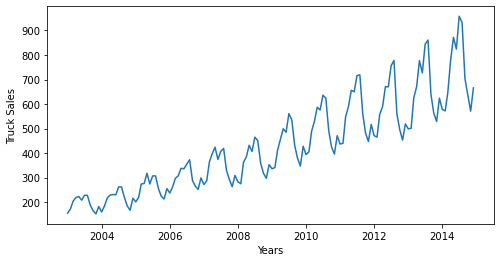

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Truck Sales')

#### Performing differencing ( d=1 ) as the data is non-stationary

Text(0, 0.5, 'Truck Sales')

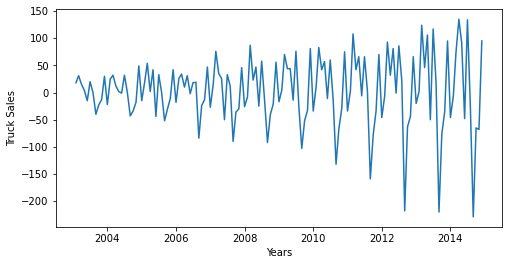

In [36]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Truck Sales')

*We observe seasonality even after differencing. Meaning the variance in the data seemss to be increasing.* 


**This suggests a log transformation of the data.**

Text(0, 0.5, 'Log (Truck Sales)')

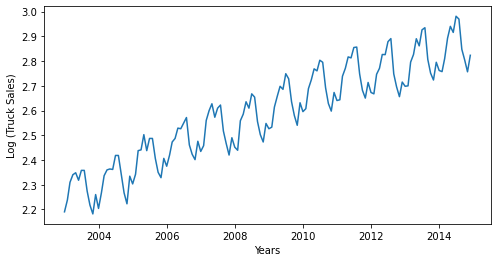

In [37]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Truck Sales)')

*We observe trend and seasonality even after taking log of the observations.*

**Performing differencing (d=1) on the log transformed time series**

Text(0, 0.5, 'Differenced Log (Truck Sales)')

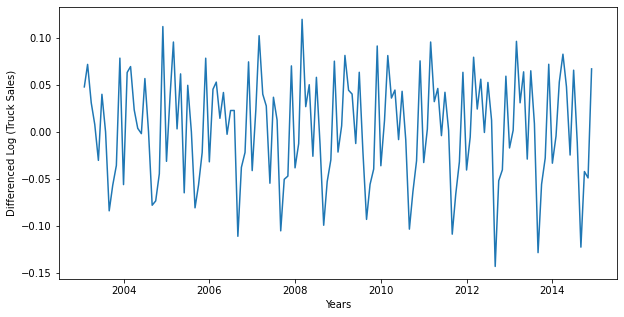

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Truck Sales)')

## Auto Regressive(AR) Models 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Autoregression means **regression of a variable on itself** which means **Autoregressive models use previous time period values to predict the current time period values.**


- One of the fundamental assumptions of an AR model is that the **time series is assumed to be a stationary process.**


- An AR(p) model (Auto-Regressive model of order p) can be written as: 

## <font color='blue'> $y_{t}$ =   $φ_{1} y_{t-1} + φ_{2}y_{t-2} + ……+ φ_{p} y_{t-p} + ε_{t}$</font>

- <font color='blue'>$ε_{t}$ </font>**is an error term which is an independent and identically distributed random variable (or in other words, a white noise) with the parameters mean = 0 and standard deviation = σ**
- The <font color='blue'>φ </font>**are regression coefficients multiplied by lagged time series variable, which captures the effect of the input variable on the output, provided intermediate values do not change.**


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Choose the order 'p' of AR model

- We look at the Partial Autocorrelations of a stationary Time Series to understand the order of Auto-Regressive models.


- For an AR model, 2 ways to identify order of 'p':


<i>1) **PACF Approach** :  the PACF method where the  (Partial Auto Correlation Function) values cut off and become zero after a certain lag.               PACF vanishes if there is no regression coefficient that far back. The cut-off value where this happens can be taken             as the order of AR as ‘p’. This can be seen from a PACF plot.</i>

- <i>If the 2nd PACF vanishes (cut off in PACF) then the 2nd coefficient is not considered and thus ‘p’ is 1.</i>
- <i>If the 3rd PACF vanishes (cuts off in PACF) then the 3rd coefficient is not considered and thus ‘p’ is 2 and so on…</i>



 - **Partial Autocorrelation of order 2 = Partial autocorrelation of lag 2 = Correlation between $𝑋_{𝑡}$ and $𝑋_{𝑡−2}$ holding $𝑋_{𝑡−1}$ fixed.**


<font color='blue'><i>2) **Lowest AIC Approach** : **the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘p’ is considered.** </i></font>


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### Using the 2nd method(Lowest AIC) to compare different orders of 'p'

In [39]:

# Define the p parameter to take any value between 0 and 2
p= range(1,4)
p

range(1, 4)

## Moving Average(MA) Models 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Moving average model **considers past residual values to predict the current time period values.** 
  These past residuals are past prediction errors.
    

- For a MA model, **the residual or error component is modeled.**


- The moving average model MA(q) of  order q can be represented as:


## <font color='blue'>$y_{t} =  ε_{t} + θ_{1}ε_{t-1} +……+ θ_{q}ε_{t-q}$</font>

- **Where $y_{t}$  time series variable, θ are numeric coefficients multiplied to lagged residuals and ε is the residual term considered as a purely random process with mean 0, variance $σ^{2}$ and  $Cov(ε_{t-1},ε_{t-q})$ = 0.**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Choose the order 'q' of MA model

- We look at the Autocorrelations of a stationary Time Series to understand the order of Moving Average models.


- For a MA model,  

<i>1) **ACF Approach** : ACF (Autocorrelation Function) values cut off at a certain lag. ACF vanishes, and there are no coefficients that far back; thus, the cut-off value where this happens is taken as the order of MA as ‘q’. This can be seen from the ACF plot.</i>



<i>2) <font color='blue'>**Lowest AIC Approach** : the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘q’ is considered. </i></font>


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### Using the 2nd method(Lowest AIC) to compare different orders of 'q'

In [40]:

# Define the q parameter to take any value between 0 and 2
q = range(1, 4)


### WHY?

- <font color='blue'>**ACF(0)=1**</font>


- <font color='blue'>**ACF(1)=PACF(1)**</font>

#### <u> Parameter </u>   (p, d, q)   <u>estimation matrix for estimating parameters towards building AR / ARMA / ARIMA / SARIMA models </u>

In [41]:


d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [42]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [43]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [29]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [30]:
seasonal_pdq
# as it seems to have 12 month seasonality as confirmned from above 

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

#### <u>Train test split</u>

In [44]:
#Separate data into train and test
data['date'] = data.index
train = data[data.index < '2013-01-01']
test = data[data.index >= '2013-01-01']


In [45]:
dftest = adfuller(train['Truck-Sales'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -0.484
DF test p-value is 0.8951


#### Using the log transformed series as there is variance in the data 

In [46]:
train_sales_ts_log = np.log10(train['Truck-Sales'])
#Log transformation on the training data to make the time series stationary as we did with full data 

In [47]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## AR Model 


- **Autoregressive models use <font color='blue'>previous time period values to predict the current time period values.**</font>

#### <u>AR Model building to estimate best 'p' ( Lowest AIC Approach )</u>

In [48]:

# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC


In [49]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 0) - AIC:-345.8632381461473
ARIMA(2, 0, 0) - AIC:-346.4809804975517
ARIMA(3, 0, 0) - AIC:-344.4866631815401


#### <u>Building AR model with best <font color='blue'>'p'</font> parameter </u>

In [57]:
best_model = ARIMA(train_sales_ts_log,order = (2,0,0))#p=2 with lowest AIC 
best_results = best_model.fit()

In [58]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:            Truck-Sales   No. Observations:                  120
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 177.240
Date:                Sat, 04 Mar 2023   AIC                           -346.481
Time:                        17:07:40   BIC                           -335.331
Sample:                    01-01-2003   HQIC                          -341.953
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5223      0.079     31.898      0.000       2.367       2.677
ar.L1          1.0998      0.126      8.721      0.000       0.853       1.347
ar.L2         -0.1491      0.126     -1.185      0.2

#### <u>Calculating RMSE for best AR model </u>

In [59]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)

In [60]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [64]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [65]:
# Compute the root mean square error
mse = ((testCopy1['Truck-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 306.142


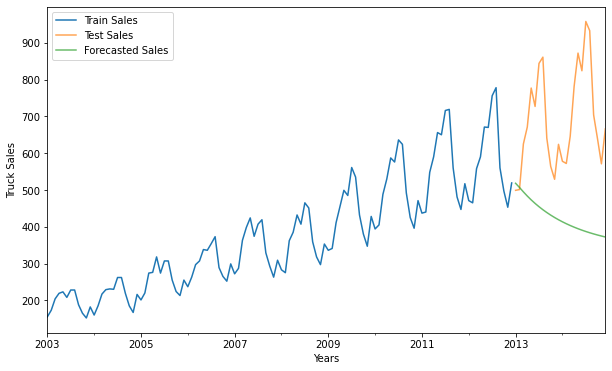

In [66]:
axis = train['Truck-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Truck-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [67]:
resultsDf = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best AR Model : ARIMA(2,0,0)'])

resultsDf

,RMSE
"Best AR Model : ARIMA(2,0,0)",306.142153


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## ARMA Model



- **Improving AutoRegressive Models through Moving Average Forecasts.**
- ARMA models consist of 2 components:-
	- **AR model: <font color='blue'>The data is modeled based on past observations.</font>**
	- **MA model: <font color='blue'>Previous forecast errors are incorporated into the model.</font>**

#### <u>ARMA Model building to estimate best <font color='blue'>'p' , 'q' </font> ( Lowest AIC Approach )</u>

In [79]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [80]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_arma:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-346.44125864627347
ARIMA(1, 0, 2) - AIC:-344.49993869054003


C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 3) - AIC:-354.4430596098681
ARIMA(2, 0, 1) - AIC:-344.4854973044252
ARIMA(2, 0, 2) - AIC:-347.28272136716896


C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 3) - AIC:-352.9450905494913


C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 1) - AIC:-346.91344802198626


C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 2) - AIC:-345.3210951540407
ARIMA(3, 0, 3) - AIC:-382.7231094421935


C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [81]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
8,"(3, 0, 3)",-382.723109
2,"(1, 0, 3)",-354.44306
5,"(2, 0, 3)",-352.945091
4,"(2, 0, 2)",-347.282721
6,"(3, 0, 1)",-346.913448


#### <u>Building ARMA model with best p,q parameter </u>

In [82]:
best_model = ARIMA(train_sales_ts_log,order = (3,0,3))
best_results = best_model.fit()

C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [83]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:            Truck-Sales   No. Observations:                  120
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 199.362
Date:                Sat, 04 Mar 2023   AIC                           -382.723
Time:                        17:25:16   BIC                           -360.423
Sample:                    01-01-2003   HQIC                          -373.667
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4777      7.311      0.339      0.735     -11.851      16.807
ar.L1         -0.7050      0.023    -30.172      0.000      -0.751      -0.659
ar.L2          0.7170      0.014     52.899      0.0

#### <u>Calculating RMSE for best MA model </u>

In [90]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)

In [91]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [92]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [93]:
# Compute the root mean square error
mse = ((testCopy1['Truck-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 214.458


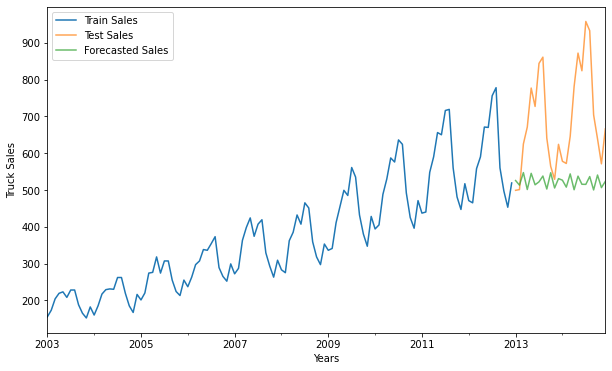

In [94]:
axis = train['Truck-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Truck-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [95]:
resultsDf1 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARMA Model : ARIMA(3,0,3)'])

resultsDf1

pd.concat([resultsDf,resultsDf1])

,RMSE
"Best AR Model : ARIMA(2,0,0)",306.142153
"Best ARMA Model : ARIMA(3,0,3)",214.458120


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## ARIMA Model

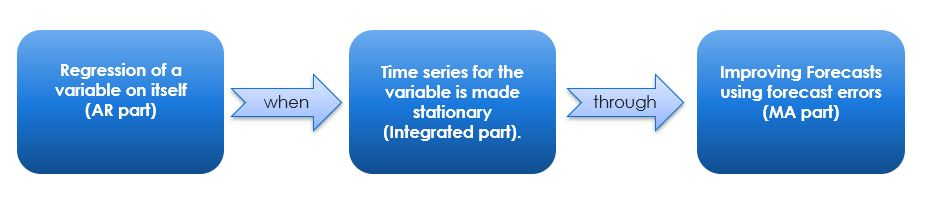

- ARIMA:- **Auto Regressive Integrated Moving Average** is a way of modeling time series data **for forecasting or predicting future data points**. 
- **Improving AR Models by making Time Series stationary through Moving AVerage Forecasts** 


- ARIMA models consist of 3 components:-
	- **AR model: <font color='blue'>The data is modeled based on past observations.</font>**
	- **Integrated component: <font color='blue'>Whether the data needs to be differenced/transformed.</font>**
	- **MA model: <font color='blue'>Previous forecast errors are incorporated into the model.</font>**

#### <u>ARIMA Model building to estimate best <font color='blue'>'p' , 'd' , 'q' </font> paramters ( Lowest AIC Approach )</u>

In [97]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [98]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-346.44125864627347
ARIMA(1, 0, 2) - AIC:-344.49993869054003


C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 3) - AIC:-354.4430596098681
ARIMA(1, 1, 1) - AIC:-345.2906867645939
ARIMA(1, 1, 2) - AIC:-343.3024474701193
ARIMA(1, 1, 3) - AIC:-357.3492782621541
ARIMA(2, 0, 1) - AIC:-344.4854973044252
ARIMA(2, 0, 2) - AIC:-347.28272136716896


C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 3) - AIC:-352.9450905494913
ARIMA(2, 1, 1) - AIC:-353.3706467914483


C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2) - AIC:-372.99946765255925
ARIMA(2, 1, 3) - AIC:-355.4113926610689


C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 1) - AIC:-346.91344802198626


C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 2) - AIC:-345.3210951540407


C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 3) - AIC:-382.7231094421935
ARIMA(3, 1, 1) - AIC:-341.58110553467804


C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:-363.782426270256
ARIMA(3, 1, 3) - AIC:-373.2354410645588


C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [99]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
14,"(3, 0, 3)",-382.723109
17,"(3, 1, 3)",-373.235441
10,"(2, 1, 2)",-372.999468
16,"(3, 1, 2)",-363.782426
5,"(1, 1, 3)",-357.349278


#### <u>Building ARIMA model with best parameters p,d,q</u>

In [100]:

best_model = ARIMA(train_sales_ts_log,order = (3,1,3))
best_results = best_model.fit()

C:\Users\ClassRoom 2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [102]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:            Truck-Sales   No. Observations:                  120
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 193.618
Date:                Sat, 04 Mar 2023   AIC                           -373.235
Time:                        17:29:20   BIC                           -353.782
Sample:                    01-01-2003   HQIC                          -365.336
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8620      0.162      5.321      0.000       0.544       1.180
ar.L2         -0.9466      0.038    -24.640      0.000      -1.022      -0.871
ar.L3          0.8233      0.154      5.337      0.0

#### <u>Calculating RMSE for best ARIMA model </u>

In [103]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)

In [104]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [105]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [106]:
# Compute the root mean square error
mse = ((testCopy1['Truck-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 224.06


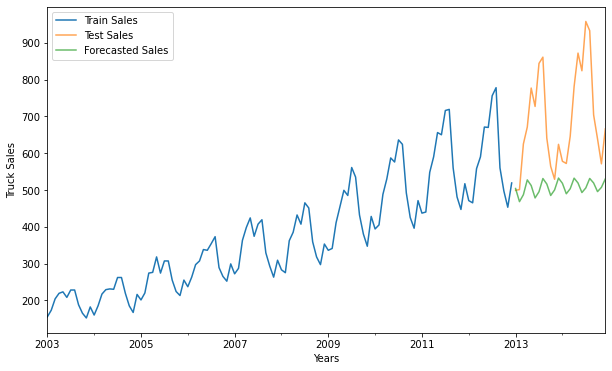

In [107]:
axis = train['Truck-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Truck-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [109]:
resultsDf2 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARIMA Model : ARIMA(3,1,3)'])

resultsDf2

pd.concat([resultsDf,resultsDf1,resultsDf2])

,RMSE
"Best AR Model : ARIMA(2,0,0)",306.142153
"Best ARMA Model : ARIMA(3,0,3)",214.458120
"Best ARIMA Model : ARIMA(3,1,3)",224.060029


 **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

 **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## SARIMA Model 

- **The ARIMA models can be extended/improved to handle seasonal components of a data series.**



- The seasonal autoregressive moving average model is given by
    -                   <b>SARIMA (p, d, q)(P, D, Q)F </b>
    
    

- The above model consists of:
	- <font color='blue'>Autoregressive and moving average components (p, q)</font>
	- <font color='blue'>Seasonal autoregressive and moving average components (P, Q) </font>
	- <font color='blue'>The ordinary and seasonal difference components of order ‘d’ and ‘D’ </font>
	- <font color='blue'>Seasonal frequency ‘F’</font>
    

- The value for the parameters (p,d,q) and (P, D, Q) can be decided by comparing different values for each and taking **the lowest   AIC value** for the model build.


- **The value for F can be consolidated by ACF plot**








#### <u>Finding Seasonality = 12 from ACF/PACF plots </u> 

In [110]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

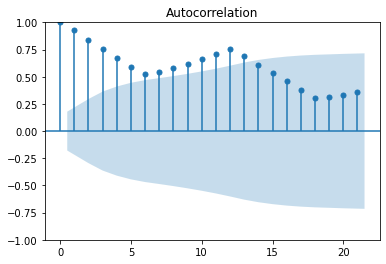

In [111]:
plot_acf(train['Truck-Sales'],alpha=0.05);

#### <u>SARIMA Model building to estimate best parameters </u>

In [112]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [113]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [71]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:-559.2780503911803


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:-481.4742861113032


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(1, 0, 3, 12) - AIC:2248.219106262915


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:-493.8785514732234


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:-435.8422103638496
SARIMA(1, 0, 1)x(1, 1, 3, 12) - AIC:-382.5229324694493


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:-497.3826189529323


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:-501.56463695844764


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 0, 3, 12) - AIC:2244.122707910329


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:-442.9672544418592


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:-427.27312777175723


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 1, 3, 12) - AIC:-359.9389578554437


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(3, 0, 1, 12) - AIC:-442.7160756714422


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(3, 0, 2, 12) - AIC:-443.60337006047195


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(3, 0, 3, 12) - AIC:1975.3351937158116


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(3, 1, 1, 12) - AIC:-389.70736059063444
SARIMA(1, 0, 1)x(3, 1, 2, 12) - AIC:-364.2478163770045


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(3, 1, 3, 12) - AIC:-383.8975886913011


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:-550.9708431449822


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:-467.79043391843777


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 0, 3, 12) - AIC:2455.585307147891


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:-486.9879160241099


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:-427.06283289318105


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 1, 3, 12) - AIC:-377.4801861076565


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:-495.0337825687873


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:-496.34364085313837


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 0, 3, 12) - AIC:2451.56479973887


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:-440.88580933198523
SARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:-423.0382662742091
SARIMA(1, 0, 2)x(2, 1, 3, 12) - AIC:-376.3170562530593


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(3, 0, 1, 12) - AIC:-440.8264024192162


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(3, 0, 2, 12) - AIC:-441.8974368557294


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(3, 0, 3, 12) - AIC:2186.00851209157


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(3, 1, 1, 12) - AIC:-393.245711640208


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(3, 1, 2, 12) - AIC:-365.11283871633026


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(3, 1, 3, 12) - AIC:-379.4947358598728


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(1, 0, 1, 12) - AIC:-545.687956620196


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(1, 0, 2, 12) - AIC:-468.69655489964714


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(1, 0, 3, 12) - AIC:2192.3584135235196


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(1, 1, 1, 12) - AIC:-483.04564526907376


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(1, 1, 2, 12) - AIC:-405.5074569850157


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(1, 1, 3, 12) - AIC:-375.8216391423021


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(2, 0, 1, 12) - AIC:-496.6592236930511


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(2, 0, 2, 12) - AIC:-490.64641885145545


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(2, 0, 3, 12) - AIC:2188.4103651935493


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(2, 1, 1, 12) - AIC:-442.8401713863159


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(2, 1, 2, 12) - AIC:-418.97434808517994
SARIMA(1, 0, 3)x(2, 1, 3, 12) - AIC:-374.37708393489555


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(3, 0, 1, 12) - AIC:-441.35540774193015


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(3, 0, 2, 12) - AIC:-441.3786913787412


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(3, 0, 3, 12) - AIC:1926.2553037130967


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(3, 1, 1, 12) - AIC:-393.6942416065208


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(3, 1, 2, 12) - AIC:-364.67477837512973
SARIMA(1, 0, 3)x(3, 1, 3, 12) - AIC:-358.16691712325394
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:-551.1522476426672
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:-482.12874451113


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:2328.785262225756
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:-486.99599214375775


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:-436.9821186810352


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:-379.1656400704051
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:-490.1226411411909


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:-493.83947839612983


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:2559.8969548363334
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:-435.93874601036197
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:-433.9917191849979


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 1, 3, 12) - AIC:-377.5028977065574


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:-434.105680401113


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:-435.70634430358507


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:2495.376018626687
SARIMA(1, 1, 1)x(3, 1, 1, 12) - AIC:-391.25505833906266


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 1, 2, 12) - AIC:-391.52738955996506


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 1, 3, 12) - AIC:-379.7231178083801
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:-544.2801579939041
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:-475.5944189850081


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:16.0


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:-483.449806461545


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:-430.2507175216358
SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:-375.2680750377075


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:-486.9708678150794


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:-482.00672953256117


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:18.0


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:-436.03126623168447


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:-426.06194705583823
SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:-373.37692429261136


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:-433.1923489271479


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:-430.8355980198727


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:20.0


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:-389.4850443351651


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:-388.18488235958034


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:-376.7276442126996


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:-538.5994946302364


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:-477.037525530554
SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:2385.144962653346


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 1, 1, 12) - AIC:-482.8881558162489


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 1, 2, 12) - AIC:-425.0971758112849
SARIMA(1, 1, 3)x(1, 1, 3, 12) - AIC:-349.127076844192


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:-488.58171872788654


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:-486.0080360997416
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:2610.6002564515347


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 1, 1, 12) - AIC:-435.0396965769363


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 1, 2, 12) - AIC:-417.4102815267993


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 1, 3, 12) - AIC:-365.6035571063409
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:-432.9700023001383


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:-435.1006540291512
SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2547.7216125943287


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 1, 1, 12) - AIC:-388.1697502878485


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 1, 2, 12) - AIC:-388.40457287570166


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 1, 3, 12) - AIC:-370.0919741058056
SARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC:-557.9488584117671


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(1, 0, 2, 12) - AIC:-478.4078321962833


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(1, 0, 3, 12) - AIC:2209.010877095205


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC:-491.364599820141


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(1, 1, 2, 12) - AIC:-427.5167728403802


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(1, 1, 3, 12) - AIC:-380.1292606311771


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:-490.2243332249259


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 0, 2, 12) - AIC:-498.9324387914187


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 0, 3, 12) - AIC:2204.9121080219343


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 1, 1, 12) - AIC:-435.9225800060474


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 1, 2, 12) - AIC:-426.27594309842453


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 1, 3, 12) - AIC:-377.0068301533058


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(3, 0, 1, 12) - AIC:-434.97872820857526


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(3, 0, 2, 12) - AIC:-436.5001384228311


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(3, 0, 3, 12) - AIC:1936.1867739655465


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(3, 1, 1, 12) - AIC:-390.6886822563576
SARIMA(2, 0, 1)x(3, 1, 2, 12) - AIC:-358.4547389290043


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(3, 1, 3, 12) - AIC:-383.12936893516206


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 0, 1, 12) - AIC:-550.0473532860357


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 0, 2, 12) - AIC:-476.2924648581745
SARIMA(2, 0, 2)x(1, 0, 3, 12) - AIC:2416.6352217557446


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 1, 1, 12) - AIC:-485.33914044285007


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 1, 2, 12) - AIC:-427.83163576328644


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 1, 3, 12) - AIC:-375.691891037198


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 0, 1, 12) - AIC:-483.9791572644157


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 0, 2, 12) - AIC:-493.62634786066275
SARIMA(2, 0, 2)x(2, 0, 3, 12) - AIC:2412.614927953621


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 1, 1, 12) - AIC:-432.20963948557346


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 1, 2, 12) - AIC:-422.157209043899


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 1, 3, 12) - AIC:-374.75616767376215


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(3, 0, 1, 12) - AIC:-430.39647156245604


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(3, 0, 2, 12) - AIC:-429.9309353025459


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(3, 0, 3, 12) - AIC:2147.0596272391062


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(3, 1, 1, 12) - AIC:-388.9908948844312


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(3, 1, 2, 12) - AIC:-356.7404569975851


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(3, 1, 3, 12) - AIC:-380.014731074995


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(1, 0, 1, 12) - AIC:-354.9096965090746


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(1, 0, 2, 12) - AIC:-396.76917038709627


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(1, 0, 3, 12) - AIC:20.0


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(1, 1, 1, 12) - AIC:-480.8801554003343


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(1, 1, 2, 12) - AIC:-414.2905980636738


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(1, 1, 3, 12) - AIC:-373.7443435617296


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(2, 0, 1, 12) - AIC:-306.610322112761


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(2, 0, 2, 12) - AIC:-285.9613299657185
SARIMA(2, 0, 3)x(2, 0, 3, 12) - AIC:22.0


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(2, 1, 1, 12) - AIC:-434.1642002082146


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(2, 1, 2, 12) - AIC:-416.5650493827121


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(2, 1, 3, 12) - AIC:-372.26765993802366


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(3, 0, 1, 12) - AIC:-182.5066385546272


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(3, 0, 2, 12) - AIC:-398.78238246401884
SARIMA(2, 0, 3)x(3, 0, 3, 12) - AIC:1949.7030837006791


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(3, 1, 1, 12) - AIC:-386.8885202637252


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(3, 1, 2, 12) - AIC:-357.8539879368184
SARIMA(2, 0, 3)x(3, 1, 3, 12) - AIC:-356.4460664013336


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:-550.8095454712767


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:-480.8287315023854


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2095.0233737371323


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:192.2609958060754
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:182.87086155831372


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:128.98556976086246


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:-482.98904493467586


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:-484.5582976620979
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:2409.2333658882885


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:159.68744254655272


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:163.90591285683476


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:129.6917960893693


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:-426.3964789200661


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:-428.2270633673387


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:364.2552513216236


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:120.8132195109603


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:119.2950278448088


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:132.85412192198174
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:-542.6692494397049
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:-473.33817953755573
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:18.0
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:-484.2180544633478


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:-429.24246826761805
SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:-372.45764121436656


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:-481.50607977498777


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:-485.4132656290304


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:20.0


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:-431.0050360450219


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:-422.9728315136405


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:-371.0789367288756


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:-427.841780035481
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:-430.1253358553452


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:22.0


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:-381.26928158996077


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 2, 12) - AIC:-374.9977733795759


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 3, 12) - AIC:-371.3122899166036
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:-536.1120567553901


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:-473.6019212002852


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:2090.300941265902


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 1, 12) - AIC:-484.25404146724526


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 2, 12) - AIC:-426.2066804007688


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 3, 12) - AIC:-368.1202343404159


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:-480.27851344672683


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:-482.1114608471577


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:2315.752493057224


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 1, 1, 12) - AIC:-446.6403448618182


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 1, 2, 12) - AIC:-424.74039066602046


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 1, 3, 12) - AIC:-367.1985570664017


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:-427.98416141472006


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:-427.5112992480525


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:2252.8752339484417


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:-390.1964862844824


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:-383.3792710548002


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:-370.73253242755857
SARIMA(3, 0, 1)x(1, 0, 1, 12) - AIC:-549.6834766886653


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(1, 0, 2, 12) - AIC:-486.92714847911327


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(1, 0, 3, 12) - AIC:2211.0128556481577


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(1, 1, 1, 12) - AIC:-484.6169655395591


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(1, 1, 2, 12) - AIC:-411.7482044699388


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(1, 1, 3, 12) - AIC:-377.88107432235716


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(2, 0, 1, 12) - AIC:-482.3802833062709


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(2, 0, 2, 12) - AIC:-492.7695543474909


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(2, 0, 3, 12) - AIC:2206.914502376842


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(2, 1, 1, 12) - AIC:-430.91077744295717


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(2, 1, 2, 12) - AIC:-422.05029696459064
SARIMA(3, 0, 1)x(2, 1, 3, 12) - AIC:-374.93028610919725


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(3, 0, 1, 12) - AIC:-429.37905331633766


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(3, 0, 2, 12) - AIC:-428.8500700675661


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(3, 0, 3, 12) - AIC:1914.835459887321


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(3, 1, 1, 12) - AIC:-383.3229352810076


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(3, 1, 2, 12) - AIC:-362.8121513683071


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(3, 1, 3, 12) - AIC:-379.0584073641377


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(1, 0, 1, 12) - AIC:-549.2672316171426
SARIMA(3, 0, 2)x(1, 0, 2, 12) - AIC:-428.6224298663548


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(1, 0, 3, 12) - AIC:2416.6258556857238


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(1, 1, 1, 12) - AIC:-478.9499051567673


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(1, 1, 2, 12) - AIC:-419.06484335954593
SARIMA(3, 0, 2)x(1, 1, 3, 12) - AIC:-373.4680493119177


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(2, 0, 1, 12) - AIC:-480.1887223804783


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(2, 0, 2, 12) - AIC:-483.1341873927283
SARIMA(3, 0, 2)x(2, 0, 3, 12) - AIC:2412.603975649103
SARIMA(3, 0, 2)x(2, 1, 1, 12) - AIC:-421.6683479332903


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(2, 1, 2, 12) - AIC:-415.4133007838711


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(2, 1, 3, 12) - AIC:-373.91724577899896


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(3, 0, 1, 12) - AIC:-420.9982752733318


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(3, 0, 2, 12) - AIC:-424.73731416875745
SARIMA(3, 0, 2)x(3, 0, 3, 12) - AIC:2147.046222126847


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(3, 1, 1, 12) - AIC:-372.41214012253346


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(3, 1, 2, 12) - AIC:-368.909635713189
SARIMA(3, 0, 2)x(3, 1, 3, 12) - AIC:-366.60531873676837


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(1, 0, 1, 12) - AIC:-289.1092761745032


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(1, 0, 2, 12) - AIC:-86.81348168973062


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(1, 0, 3, 12) - AIC:22.0


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(1, 1, 1, 12) - AIC:-481.657374127686


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(1, 1, 2, 12) - AIC:-408.28117626233654


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(1, 1, 3, 12) - AIC:-372.4692589782514


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(2, 0, 1, 12) - AIC:-200.76433277637105


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(2, 0, 2, 12) - AIC:-266.74611992302295


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(2, 0, 3, 12) - AIC:2725.774448334356
SARIMA(3, 0, 3)x(2, 1, 1, 12) - AIC:-430.77391867708974


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(2, 1, 2, 12) - AIC:-410.57436890268355


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(2, 1, 3, 12) - AIC:-370.753231040702


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(3, 0, 1, 12) - AIC:-206.7649015022609


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(3, 0, 2, 12) - AIC:-195.82128705933232


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(3, 0, 3, 12) - AIC:2472.4549336590862


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(3, 1, 1, 12) - AIC:-378.4243957445127


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(3, 1, 2, 12) - AIC:-371.77522286252594


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(3, 1, 3, 12) - AIC:-374.4809991727223


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:-543.3929438627422
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:-481.4635487981319


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:2434.683407968973


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 1, 1, 12) - AIC:-482.2115374704316


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 1, 2, 12) - AIC:-435.89074931677794
SARIMA(3, 1, 1)x(1, 1, 3, 12) - AIC:-376.06216475665457
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:-475.52295362851


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:-480.2351224791655


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:2665.795809063443
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:-426.33267896101677


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 1, 2, 12) - AIC:-423.4939992282032


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 1, 3, 12) - AIC:-373.3657004238356
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:-424.44502976094975


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:-423.7086712696188


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:2569.431778183376


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 1, 12) - AIC:-379.9767049169953


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 2, 12) - AIC:-378.37333809118735


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 3, 12) - AIC:-372.71772308194335
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:-317.85711799684833


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:-72.16126517255215
SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:2859.0787355172442


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 1, 12) - AIC:-481.84087820981074


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 2, 12) - AIC:-432.94689476186693


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 3, 12) - AIC:-373.7839003888192


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:35.361508156673025


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:50.15264128091056


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3002.152502610926


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 1, 12) - AIC:-442.6073175005729


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 2, 12) - AIC:-439.7566559255927


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:-370.6943446548395


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:32.554551735722704


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:39.812629005940515


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:24.0


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:-395.7964828006496
SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:-369.0079327803896


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:-385.9689225495327


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:-535.436407256927


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:-471.9771637243033
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:605.9109061855836


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 1, 1, 12) - AIC:-482.29502934517143


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 1, 2, 12) - AIC:-426.02283296060045


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:-366.9466141188757


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:-474.0351925677022


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:-478.57090944502966


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:940.8480040225629


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:-432.2367228441012


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:-427.4701738938975


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:-365.5313659013744


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:-419.40944429550143


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:-417.94666800462284


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:847.3474477141885


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:-394.3899958155539


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:-369.6564358756423
SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:-384.1684553989222


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [72]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

,param,seasonal,AIC
0,"(1, 0, 1)","(1, 0, 1, 12)",-559.278050
108,"(2, 0, 1)","(1, 0, 1, 12)",-557.948858
54,"(1, 1, 1)","(1, 0, 1, 12)",-551.152248
18,"(1, 0, 2)","(1, 0, 1, 12)",-550.970843
162,"(2, 1, 1)","(1, 0, 1, 12)",-550.809545


#### Inference

* Criteria to choose the best fit model is the lowest/minimum AIC value 

For ARIMA(p, d, q) × (P, D, Q)S,
we got SARIMAX(1, 0, 1)x(1, 0, 1, 12)model with the least AIC of -559.278050

Here, 
* p = non-seasonal AR order = 1,
* d = non-seasonal differencing = 0,
* q = non-seasonal MA order = 1,
* P = seasonal AR order = 1,
* D = seasonal differencing = 0,
* Q = seasonal MA order = 1,
* S = time span of repeating seasonal pattern = 12


#### <u>Building SARIMA model with the best parameters </u>


In [114]:
best_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                      order=(1, 0, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [115]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                        Truck-Sales   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 302.280
Date:                            Sat, 04 Mar 2023   AIC                           -594.560
Time:                                    17:41:55   BIC                           -580.623
Sample:                                01-01-2003   HQIC                          -588.900
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9956      0.006    159.071      0.000       0.983       1.008
ma.L1         -0.2951      0.084   

In [116]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)

In [117]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)

In [118]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [119]:
testCopy

,Month,Year,Truck-Sales,date,sales_ts_forecasted
2013-01-01,Jan,2013,499,2013-01-01,481.762685
2013-02-01,Feb,2013,501,2013-02-01,482.503728
2013-03-01,Mar,2013,625,2013-03-01,584.523098
2013-04-01,Apr,2013,671,2013-04-01,623.903115
2013-05-01,May,2013,777,2013-05-01,697.299515
2013-06-01,Jun,2013,727,2013-06-01,687.588926
2013-07-01,Jul,2013,844,2013-07-01,767.209626
2013-08-01,Aug,2013,861,2013-08-01,773.006016
2013-09-01,Sep,2013,641,2013-09-01,585.766562
2013-10-01,Oct,2013,564,2013-10-01,514.204866


In [120]:
# Compute the root mean square error
mse = ((testCopy['Truck-Sales'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 84.276


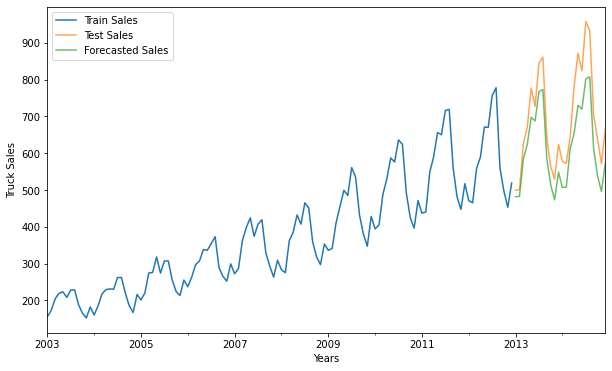

In [121]:
axis = train['Truck-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy['Truck-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [122]:
resultsDf3 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best SARIMA Model : SARIMAX(1, 0, 1)x(1, 0, 1, 12)'])

pd.concat([resultsDf,resultsDf1,resultsDf2,resultsDf3])

,RMSE
"Best AR Model : ARIMA(2,0,0)",306.142153
"Best ARMA Model : ARIMA(3,0,3)",214.458120
"Best ARIMA Model : ARIMA(3,1,3)",224.060029
"Best SARIMA Model : SARIMAX(1, 0, 1)x(1, 0, 1, 12)",84.276387


 **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <u>Forecast sales using the best fit SARIMA model as per RMSE </u>

In [123]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [124]:
n_steps = 36
idx = pd.date_range(start='2015-01-01',end='2017-12-31',freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2015-01-01,481.762685,447.699848,518.417162,447.699848,518.417162
2015-02-01,482.503728,441.181478,527.696331,441.181478,527.696331
2015-03-01,584.523098,527.255401,648.010909,527.255401,648.010909
2015-04-01,623.903115,556.126242,699.940170,556.126242,699.940170
2015-05-01,697.299515,614.946752,790.680839,614.946752,790.680839


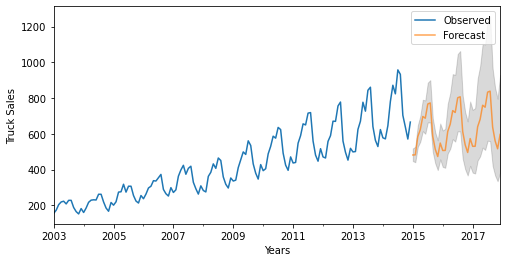

In [125]:
# plot the forecast along with the confidence band

axis = sales_ts.plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Sales')
plt.legend(loc='best')
plt.show()

#### <u>Plot ACF and PACF for residuals of ARIMA model to ensure no more information is left for extraction</u>

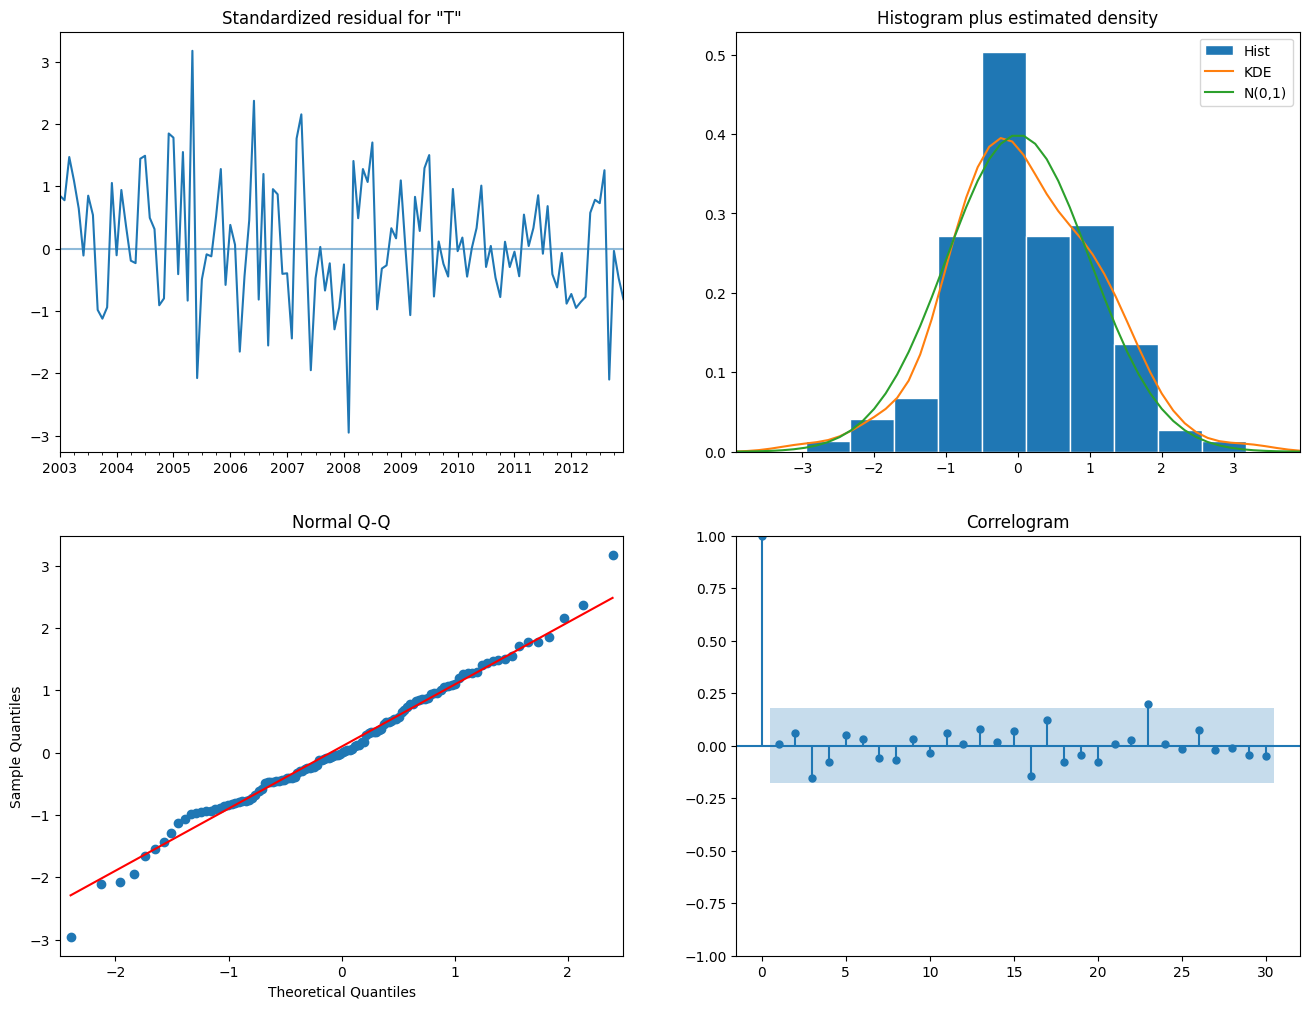

In [85]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

#### Note : <u>4 plots in the residuals diagnostic plots tell us</u> : 

- **Standardized residuals plot**: <i>The top left plot shows 1-step-ahead standardized residuals. 
    If model is working correctly, then no pattern should be obvious in the residuals which is clearly not visible from the plot as well .</i>



- **Histogram plus estimated density plot**: <i>This plot shows the distribution of the residuals.The orange line shows a smoothed version of this histogram, and the green line shows a normal distribution. If the model is good these two lines should be the same. Here there are small differences between them, which indicate that our model is doing just well enough.</i>



- **Normal Q-Q plot**: <i>The Q-Q plot compare the distribution of residuals to normal distribution. If the distribution of the residuals is normal, then all the points should lie along the red line, except for some values at the end, which is exactly happening in this case.</i>



- **Correlogram plot**: <i>The correlogram plot is the ACF plot of the residuals rather than the data. 95% of the correlations for lag >0  should not be significant (within the blue shades). If there is a significant correlation in the residuals, it means that there is information in the data that was not captured by the model, which is clearly not in this case</i> .

### The entire process of model building till we forecast can be summarized by the <u><font color='blue'>Box Jenkin's Method</font> :</u>

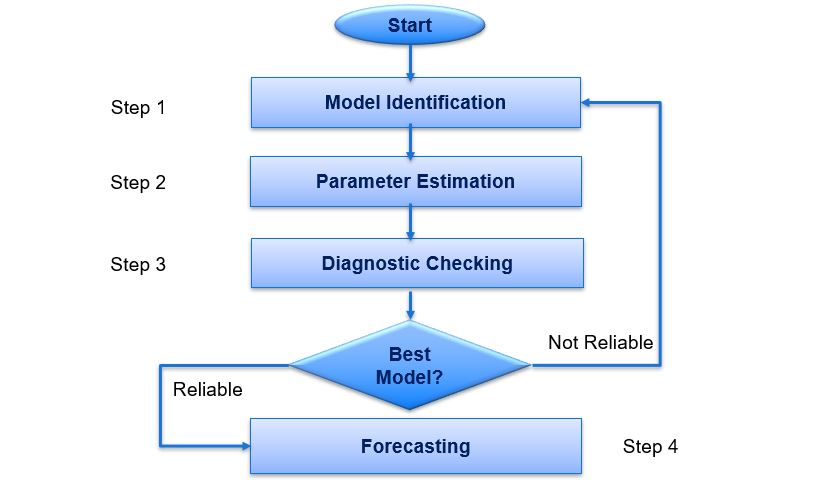

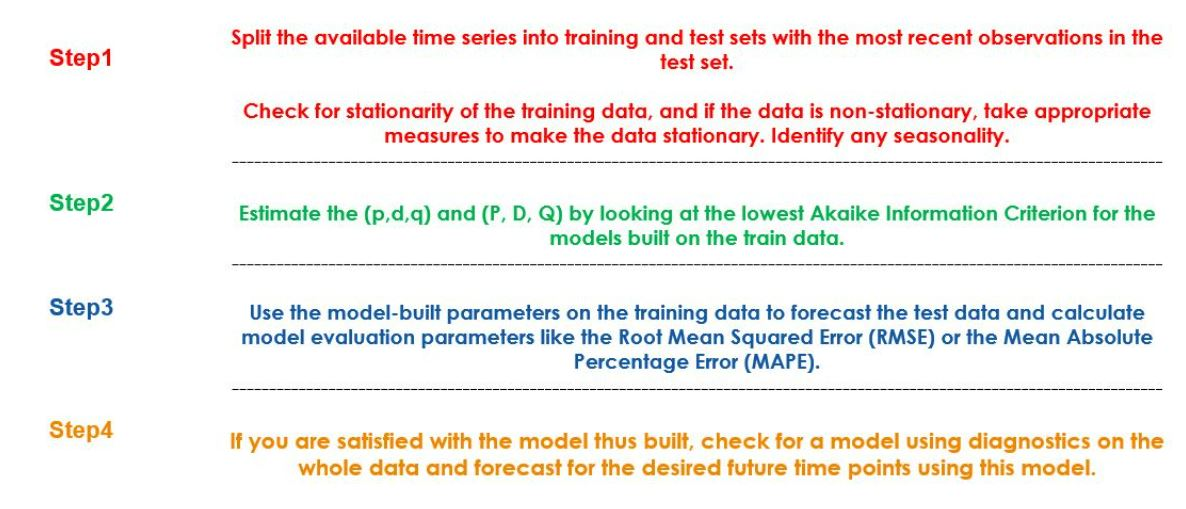

### END